# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
from scipy.stats import linregress

# Import API key
# enter user's key into api_key file
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    path = "/Users/matth/Desktop"
    sys.path.insert(0, path)
    from API_Keys import api_key
    weather_api_key= api_key["https://openweathermap.org/"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import pretty print
import pprint as pprint

#for date title in plots and filenames
from datetime import datetime

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
#build url with a few other params, api key, and units imperial for temp in F and windspeed in mph.
query_url = base_url + "appid=" + weather_api_key +"&units=imperial&q="

In [4]:
#set min number of cities needed
citymin = 500



# initialize lists for data storage
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Lat=[]
Long=[]
# include a list of cities that error out.
city_not_found=[]
#initialize count how many cities we've found weather data for.
citycount=0
#check if we have enough cities, if not, abort. if so, proceed to for loop.
if len(cities)<citymin:
    print("-----------------------------")
    print(f"Data Retrieval Aborted.")
    print(f"Rerun Generate Cities List to ensure >{citymin} cities.")
    print("-----------------------------")
else:
    print("Beginning Data Retrieval")     
    print("-----------------------------")
    #begin for loop to store records for each city
    for city in cities:
        try:
            city_url = query_url + city
            response = requests.get(city_url).json()
            # Add a one second interval between queries to (hopefully) stay within API query limits
            time.sleep(.25)
            # Use response to generate lists.
            Max_Temp.append(response["main"]["temp_max"]) 
            Humidity.append(response["main"]["humidity"])
            Cloudiness.append(response["clouds"]["all"])
            Wind_Speed.append(response["wind"]["speed"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Lat.append(response["coord"]["lat"])
            Long.append(response["coord"]["lon"])
            citycount=citycount+1
            print(f"processing record number {citycount} for | {city}")
        except:
            print(f"City: {city} not found. Adding to list city_not_found instead...")
            # Marking the row as NaN for debugging/testing purposes even though these get eliminated late. 
            Max_Temp.append(float("NaN")) 
            Humidity.append(float("NaN"))
            Cloudiness.append(float("NaN"))
            Wind_Speed.append(float("NaN"))
            Country.append(float("NaN"))
            Date.append(float("NaN"))
            Lat.append(float("NaN"))
            Long.append(float("NaN"))
            city_not_found.append(city)
    #end for loop, print summary.      
    print("-----------------------------")
    print("Data Retrieval Complete")  
    print(f"Records for {citycount} cities created.")
    print(f"{len(city_not_found)} cities not found and skipped. See list: city_not_found for details.")
    print("-----------------------------")
    if citycount<citymin:
        print(f"Warning: Though more than {citymin} cities were input,")
        print(f"only {citycount} cities have corresponding weather data.")
        print(f"Consider reruning from Generate Cities to boost count.")
# clears api keys after use.
weather_api_key=[]
query_url=[]
city_url=[]

Beginning Data Retrieval
-----------------------------
processing record number 1 for | iqaluit
processing record number 2 for | krabi
processing record number 3 for | hilo
processing record number 4 for | busselton
processing record number 5 for | blieskastel
City: taolanaro not found. Adding to list city_not_found instead...
processing record number 6 for | aykhal
processing record number 7 for | yellowknife
processing record number 8 for | castro
processing record number 9 for | kodiak
processing record number 10 for | dikson
processing record number 11 for | dingle
processing record number 12 for | khatanga
processing record number 13 for | east london
processing record number 14 for | marinette
processing record number 15 for | mount gambier
processing record number 16 for | rikitea
processing record number 17 for | sabha
processing record number 18 for | qaqortoq
processing record number 19 for | hithadhoo
processing record number 20 for | tasiilaq
processing record number 21 for

City: aporawan not found. Adding to list city_not_found instead...
processing record number 171 for | laguna
processing record number 172 for | atambua
processing record number 173 for | nekrasovskiy
processing record number 174 for | borgosesia
processing record number 175 for | peniche
processing record number 176 for | lomovka
processing record number 177 for | naze
processing record number 178 for | ancud
processing record number 179 for | narsaq
processing record number 180 for | hobyo
processing record number 181 for | gerash
City: tarudant not found. Adding to list city_not_found instead...
processing record number 182 for | acapulco
processing record number 183 for | asau
processing record number 184 for | kieta
processing record number 185 for | axim
processing record number 186 for | fairbanks
processing record number 187 for | victoria point
processing record number 188 for | beringovskiy
City: garm not found. Adding to list city_not_found instead...
City: lolua not found. A

processing record number 331 for | slave lake
processing record number 332 for | pasighat
processing record number 333 for | barquisimeto
processing record number 334 for | linxia
processing record number 335 for | san nicolas
processing record number 336 for | anadyr
processing record number 337 for | sao joao da barra
City: artyk not found. Adding to list city_not_found instead...
City: bolshoy uluy not found. Adding to list city_not_found instead...
processing record number 338 for | mahebourg
processing record number 339 for | moose factory
processing record number 340 for | thinadhoo
processing record number 341 for | jalu
processing record number 342 for | gaptsakh
processing record number 343 for | xichang
processing record number 344 for | lianzhou
processing record number 345 for | santiago del estero
processing record number 346 for | merauke
processing record number 347 for | lazaro cardenas
processing record number 348 for | filimonovo
processing record number 349 for | tad

City: tabarqah not found. Adding to list city_not_found instead...
processing record number 493 for | vila franca do campo
processing record number 494 for | manavalakurichi
processing record number 495 for | abu samrah
processing record number 496 for | halifax
processing record number 497 for | gizo
processing record number 498 for | dourados
processing record number 499 for | szabadszallas
processing record number 500 for | nsanje
processing record number 501 for | santa maria
City: burkhala not found. Adding to list city_not_found instead...
processing record number 502 for | half moon bay
processing record number 503 for | mingoyo
processing record number 504 for | bradley
processing record number 505 for | mitsamiouli
processing record number 506 for | adamovka
processing record number 507 for | kitob
processing record number 508 for | tungor
processing record number 509 for | goregaon
processing record number 510 for | marco
processing record number 511 for | cuamba
processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_city= {"City": cities,
               "Lat": Lat,
               "Lng": Long,
               "Max Temp": Max_Temp,
               "Humidity": Humidity,
               "Cloudiness": Cloudiness,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# this line drops any cities that could not be found, which were marked as NaN
# reset the index so it matches row number.
weather_city_df = pd.DataFrame(weather_city).dropna(how="any").reset_index(drop=True)
# view the dataframe, able to confirm row counts against the printout above.
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-14.01,70.0,75.0,17.27,CA,1.615646e+09
1,krabi,8.0726,98.9105,82.40,65.0,20.0,6.91,TH,1.615646e+09
2,hilo,19.7297,-155.0900,66.99,88.0,20.0,8.05,US,1.615645e+09
3,busselton,-33.6500,115.3333,55.99,83.0,0.0,14.58,AU,1.615645e+09
4,blieskastel,49.2372,7.2562,45.00,93.0,20.0,16.11,DE,1.615646e+09
...,...,...,...,...,...,...,...,...,...
592,tskaltubo,42.3254,42.5979,53.60,24.0,0.0,8.05,GE,1.615646e+09
593,sungairaya,0.7000,108.9000,79.30,83.0,100.0,6.62,ID,1.615646e+09
594,robertsport,6.7533,-11.3686,82.44,78.0,83.0,11.77,LR,1.615646e+09
595,dodge city,37.7528,-100.0171,39.20,100.0,90.0,13.80,US,1.615646e+09


In [6]:
city_not_found

['taolanaro',
 'attawapiskat',
 'karaul',
 'barentsburg',
 'vaitupu',
 'tsihombe',
 'belushya guba',
 'amderma',
 'bolungarvik',
 'kamenskoye',
 'one hundred mile house',
 'aporawan',
 'tarudant',
 'garm',
 'lolua',
 'sentyabrskiy',
 'rawannawi',
 'illoqqortoormiut',
 'mys shmidta',
 'chagda',
 'grand centre',
 'marcona',
 'tumannyy',
 'palabuhanratu',
 'labutta',
 'urdzhar',
 'burica',
 'sorvag',
 'artyk',
 'bolshoy uluy',
 'tawkar',
 'falealupo',
 'tawnat',
 'tabiauea',
 'nizhneyansk',
 'port-de-paix',
 'ijaki',
 'tuggurt',
 'saleaula',
 'tunduru',
 'zachagansk',
 'samalaeulu',
 'kazalinsk',
 'tabarqah',
 'burkhala',
 'bolshaya murta',
 'samusu',
 'galgani',
 'halalo',
 'zhanatas',
 'tir pol',
 'scottsburgh',
 'grand river south east']

In [7]:
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

weather_city_df_agg=pd.DataFrame({"count": weather_city_df[col_list].count(),
                                  "mean": weather_city_df[col_list].mean(),
                                  "std": weather_city_df[col_list].std(),
                                  "min": weather_city_df[col_list].min(),
                                  "25%": weather_city_df[col_list].quantile(q=0.25).tolist(),
                                  "50%": weather_city_df[col_list].quantile(q=0.5).tolist(),
                                  "75%": weather_city_df[col_list].quantile(q=0.75).tolist(),
                                  "max": weather_city_df[col_list].max()}).T
weather_city_df_agg

# can also be done with .describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,20.929367,14.812817,56.047353,68.402010,49.793970,8.901658,1.615646e+09
std,32.987618,90.050448,28.674389,21.778457,39.072288,5.915674,1.269876e+02
min,-54.800000,-179.166700,-24.470000,1.000000,0.000000,0.430000,1.615645e+09
25%,-6.216700,-64.261500,36.180000,57.000000,5.000000,4.290000,1.615646e+09
50%,27.312500,17.944200,63.000000,73.000000,45.000000,7.740000,1.615646e+09
75%,48.500000,91.641900,79.410000,85.000000,90.000000,12.190000,1.615646e+09
max,78.218600,179.316700,103.230000,100.000000,100.000000,35.680000,1.615646e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_bool = weather_city_df["Humidity"]>100
index_hum_over100 = [i for i in range(len(index_bool)-1) if index_bool[i]==True]
index_hum_over100 

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# did not need to pass inplace. The method below preserves the data eitherway and passes clean_city_data for future work.
if len(index_hum_over100) > 0:
    clean_city_data = weather_city_df.drop(index_hum_over100).reset_index(drop=True)
else:
    clean_city_data = weather_city_df
clean_city_data.to_csv('../' + output_data_file)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-14.01,70.0,75.0,17.27,CA,1.615646e+09
1,krabi,8.0726,98.9105,82.40,65.0,20.0,6.91,TH,1.615646e+09
2,hilo,19.7297,-155.0900,66.99,88.0,20.0,8.05,US,1.615645e+09
3,busselton,-33.6500,115.3333,55.99,83.0,0.0,14.58,AU,1.615645e+09
4,blieskastel,49.2372,7.2562,45.00,93.0,20.0,16.11,DE,1.615646e+09
...,...,...,...,...,...,...,...,...,...
592,tskaltubo,42.3254,42.5979,53.60,24.0,0.0,8.05,GE,1.615646e+09
593,sungairaya,0.7000,108.9000,79.30,83.0,100.0,6.62,ID,1.615646e+09
594,robertsport,6.7533,-11.3686,82.44,78.0,83.0,11.77,LR,1.615646e+09
595,dodge city,37.7528,-100.0171,39.20,100.0,90.0,13.80,US,1.615646e+09


In [10]:
#Statistics Summary Table for clean_city_data
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

clean_city_data_agg=pd.DataFrame({"count": clean_city_data[col_list].count(),
                                  "mean": clean_city_data[col_list].mean(),
                                  "std": clean_city_data[col_list].std(),
                                  "min": clean_city_data[col_list].min(),
                                  "25%": clean_city_data[col_list].quantile(q=0.25).tolist(),
                                  "50%": clean_city_data[col_list].quantile(q=0.5).tolist(),
                                  "75%": clean_city_data[col_list].quantile(q=0.75).tolist(),
                                  "max": clean_city_data[col_list].max()}).T
clean_city_data_agg

#can also be done with describe.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,5.970000e+02
mean,20.929367,14.812817,56.047353,68.402010,49.793970,8.901658,1.615646e+09
std,32.987618,90.050448,28.674389,21.778457,39.072288,5.915674,1.269876e+02
min,-54.800000,-179.166700,-24.470000,1.000000,0.000000,0.430000,1.615645e+09
25%,-6.216700,-64.261500,36.180000,57.000000,5.000000,4.290000,1.615646e+09
50%,27.312500,17.944200,63.000000,73.000000,45.000000,7.740000,1.615646e+09
75%,48.500000,91.641900,79.410000,85.000000,90.000000,12.190000,1.615646e+09
max,78.218600,179.316700,103.230000,100.000000,100.000000,35.680000,1.615646e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
plt.style.use('ggplot')

In [12]:
# Create a dictionary to keep plot titles professional, while keeping dataframe column names
# consistent with those provided in the expected output
colname_dic = {"Lat": "Latitude",
               "Lng": "Longitude", # not used in plots
               "Max Temp": "Temperature (F)", 
               "Humidity": "Humidity (%)",
               "Cloudiness": "Cloudiness (%)",
               "Wind Speed": "Wind Speed (mph)",
               "Date": "Date Value"} # not used in plots

In [13]:
# Define a function that takes in the column heading titles for the choice of measurements from the data frames.
# The function will create a labeled scatter plot with interpretation. 
def Weather_Scatter(x_val,y_val):
    colx = x_val
    coly = y_val

    # set up x, y and title for plot
    x=clean_city_data[colx]
    y=clean_city_data[coly]
    plot_title = colname_dic[colx] +" vs. " + colname_dic[coly]

    #plot setup
    plt.scatter(x,y)
    plt.xlabel(colname_dic[colx])
    plt.ylabel(colname_dic[coly])
    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

    #Save as png in output data folder with date and timestampe
    plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

    #Explanation
    print(f"This plot examines and displays the relationship between {colname_dic[colx]} and {colname_dic[coly]} for the clean_city_data.")
    print(f"Questions to ask might include: As {colname_dic[colx]} increases/decreases, what happens to {colname_dic[coly]}? Does it increase/decrease?")

## Latitude vs. Temperature Plot

This plot examines and displays the relationship between Latitude and Temperature (F) for the clean_city_data.
Questions to ask might include: As Latitude increases/decreases, what happens to Temperature (F)? Does it increase/decrease?


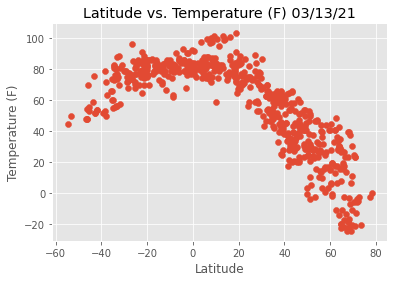

In [14]:
Weather_Scatter("Lat","Max Temp")

## Latitude vs. Humidity Plot

This plot examines and displays the relationship between Latitude and Humidity (%) for the clean_city_data.
Questions to ask might include: As Latitude increases/decreases, what happens to Humidity (%)? Does it increase/decrease?


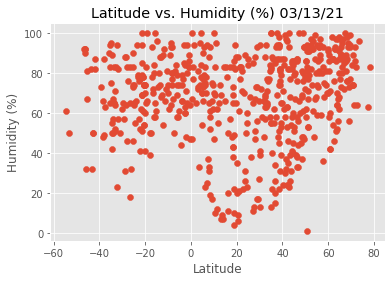

In [15]:
Weather_Scatter("Lat", "Humidity")

## Latitude vs. Cloudiness Plot

This plot examines and displays the relationship between Latitude and Cloudiness (%) for the clean_city_data.
Questions to ask might include: As Latitude increases/decreases, what happens to Cloudiness (%)? Does it increase/decrease?


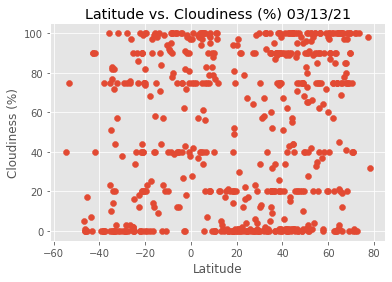

In [16]:
Weather_Scatter("Lat", "Cloudiness")

## Latitude vs. Wind Speed Plot

This plot examines and displays the relationship between Latitude and Wind Speed (mph) for the clean_city_data.
Questions to ask might include: As Latitude increases/decreases, what happens to Wind Speed (mph)? Does it increase/decrease?


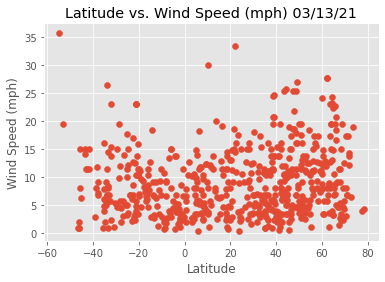

In [17]:
Weather_Scatter("Lat", "Wind Speed")

## Linear Regression

In [54]:
# This section creates a function to perform the scatter plot, linear regression, and analysis.
# The two plots (Northern and Southern hemispheres) are combined into a single figure for each pair of variables.

def Hemisphere_Analysis(x_val, y_val):

    colx = x_val
    coly = y_val

    #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
    correlation_dic = {}
    slope_dic = {}
    
    # Initialize lists for strength (qualifies correlation based on quantity) 
    # & behavior (as x increases y behavior (increases/decreases))
    strength=[]
    behavior=[]
    
    # subplots takes rows, columns for how many subplots
    #figsize default is 6.4 and 4.8
    fig = plt.figure(figsize=(6,15))
    # for good picture of referring to subplots use 
    #https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
 
    for (hemisphere, ax) in  [("Northern", ax1), ("Southern",ax2)]:
        if hemisphere == "Northern":
            logical_hem = clean_city_data["Lat"]>=0
        elif hemisphere == "Southern":
            logical_hem = clean_city_data["Lat"]<=0
        
        #Set up x and y for the scatter plot using params above.
        x=clean_city_data[logical_hem][colx]
        y=clean_city_data[logical_hem][coly]
        
        #Set up title automatically. Also helps very the right data is being grabbed.
        plot_title = hemisphere + "Hemisphere - " + colname_dic[colx] +" vs. " + colname_dic[coly] 

        #linreg (with plot equation)
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
        regress_values = slope*x + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        #plot linreg with equation
        ax.plot(x,regress_values,"r-")
        # dynamic placement for annotation based on the line. Always above the data. 
        # ax.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
        #ax.set_ylim(y.min(),y.max())
        #plot setup
        ax.scatter(x,y,color="blue",alpha=0.5)
        ax.set_xlabel(colname_dic[colx])
        ax.set_ylabel(colname_dic[coly])
        ax.set_title(plot_title + " "+ datetime.today().strftime("%m/%d/%y") +"\nLine Equation: " + line_eq)

       

        #Correlation
        correlation_dic[hemisphere] = round(st.pearsonr(x,y)[0],2)
        slope_dic[hemisphere]=slope
    
    
    slope_list = [slope_dic["Northern"], slope_dic["Southern"]]
    for slope in slope_list:
        if slope>0:
            behavior.append("increases")
        elif slope == 0:
            behavior.append("does not change")
        elif slope < 0:
            behavior.append("decreases")


    corr_list = [correlation_dic["Northern"], correlation_dic["Southern"]]
    for corr in corr_list:
        if 0<= abs(corr) <=.39:
            strength.append("weak")
        elif .4<=abs(corr)<=.65: 
                strength.append("moderate")
        elif .66<=abs(corr)<=1:
                strength.append("strong")
    
    #Save as png in output data folder with date and timestampe
    plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')
        
    print(f"For the northern hemisphere, as {colname_dic[colx]} increases, {colname_dic[coly]} {behavior[0]}.")
    print(f"For the southern hemisphere, as {colname_dic[colx]} increases, {colname_dic[coly]} {behavior[1]}.")
    print(f"The correlation for {colname_dic[colx]} vs. {colname_dic[coly]} in the Northern Hemisphere is {correlation_dic['Northern']} which is {strength[0]}.")  
    print(f"The correlation for {colname_dic[colx]} vs. {colname_dic[coly]} in the Southern Hemisphere is {correlation_dic['Southern']} which is {strength[1]}.")        

####  Max Temp vs. Latitude Linear Regression

For the northern hemisphere, as Latitude increases, Temperature (F) decreases.
For the southern hemisphere, as Latitude increases, Temperature (F) increases.
The correlation for Latitude vs. Temperature (F) in the Northern Hemisphere is -0.89 which is strong.
The correlation for Latitude vs. Temperature (F) in the Southern Hemisphere is 0.65 which is moderate.


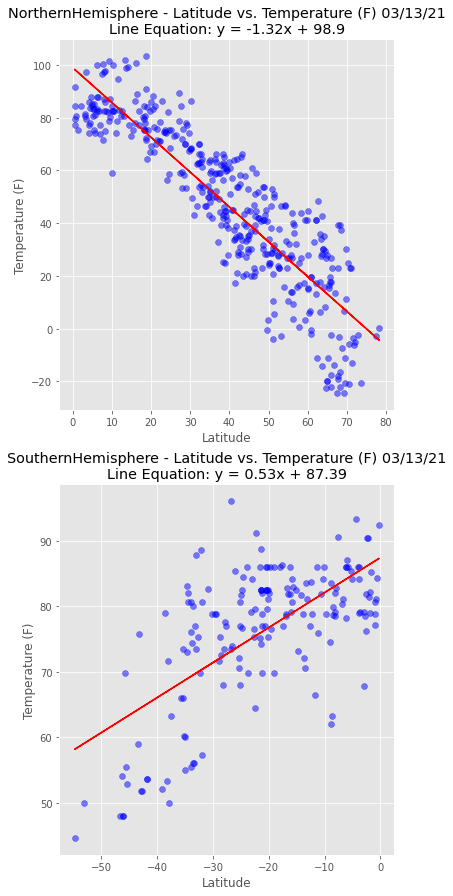

In [55]:
Hemisphere_Analysis("Lat", "Max Temp")

####  Humidity (%) vs. Latitude Linear Regression

For the northern hemisphere, as Latitude increases, Humidity (%) increases.
For the southern hemisphere, as Latitude increases, Humidity (%) increases.
The correlation for Latitude vs. Humidity (%) in the Northern Hemisphere is 0.28 which is weak.
The correlation for Latitude vs. Humidity (%) in the Southern Hemisphere is 0.14 which is weak.


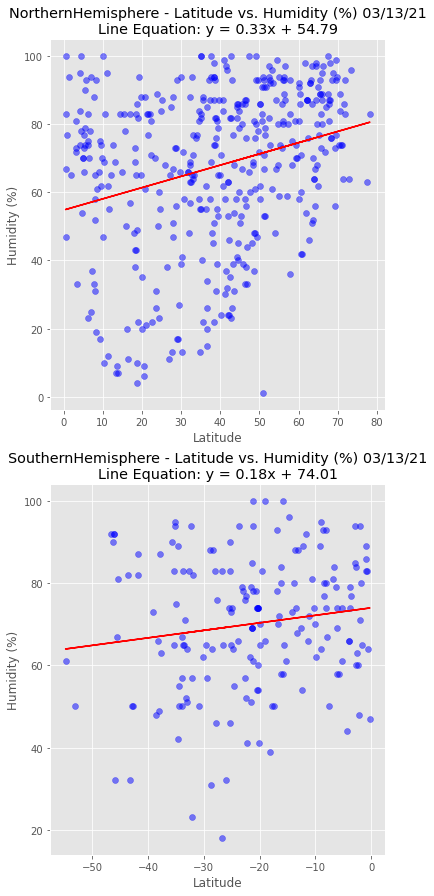

In [52]:
Hemisphere_Analysis("Lat", "Humidity")

####  Cloudiness (%) vs. Latitude Linear Regression

For the northern hemisphere, as Latitude increases, Cloudiness (%) increases.
For the southern hemisphere, as Latitude increases, Cloudiness (%) increases.
The correlation for Latitude vs. Cloudiness (%) in the Northern Hemisphere is 0.13 which is weak.
The correlation for Latitude vs. Cloudiness (%) in the Southern Hemisphere is 0.35 which is weak.


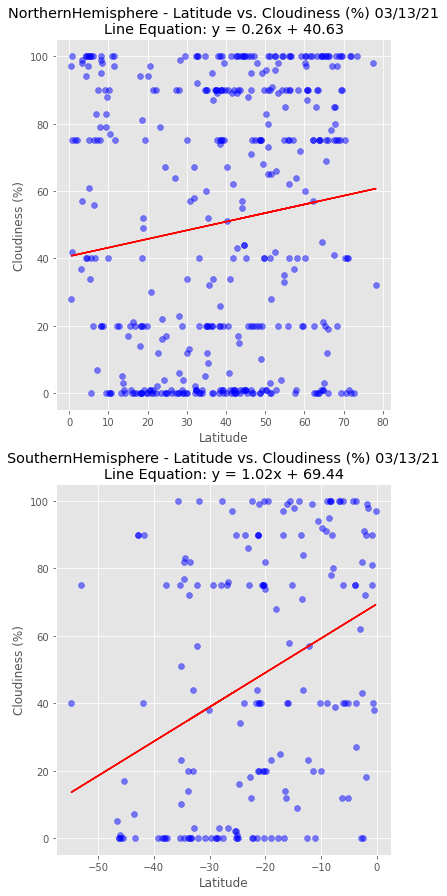

In [56]:
Hemisphere_Analysis("Lat", "Cloudiness")

#### Wind Speed (mph) vs. Latitude Linear Regression

For the northern hemisphere, as Latitude increases, Wind Speed (mph) increases.
For the southern hemisphere, as Latitude increases, Wind Speed (mph) decreases.
The correlation for Latitude vs. Wind Speed (mph) in the Northern Hemisphere is 0.18 which is weak.
The correlation for Latitude vs. Wind Speed (mph) in the Southern Hemisphere is -0.28 which is weak.


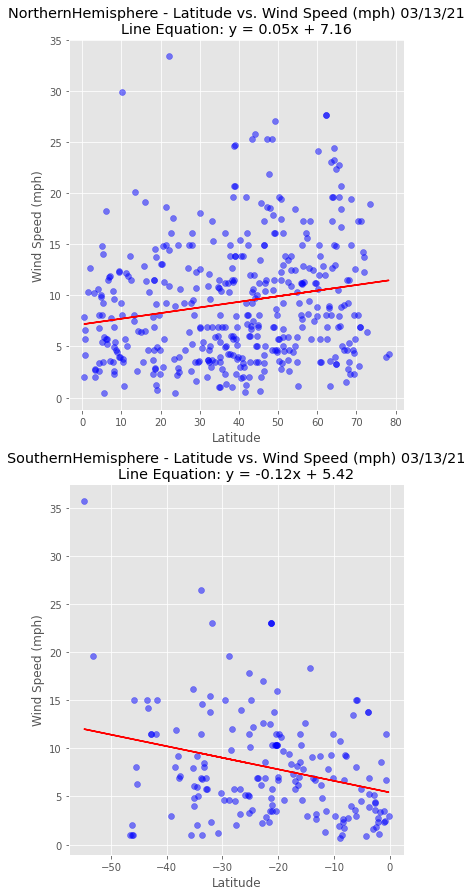

In [57]:
Hemisphere_Analysis("Lat", "Wind Speed")

####  Notes

In [ ]:
# # This code was used to develop the function Hemisphere_Analysis. It does not need to be run for the HW.

# colx = "Lat"
# coly = "Wind Speed"
# #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
# logical_hem = clean_city_data["Lat"]<0

# #Set up x and y for the scatter plot using params above.
# x=clean_city_data[logical_hem][colx]
# y=clean_city_data[logical_hem][coly]
# plot_title = colx +" vs. " + coly

# #Set up title automatically. Also helps very the right data is being grabbed.
# if min(x)>0:
#     title_hem  = "Northern Hemisphere - "
# else:
#     title_hem = "Southern Hemisphere - "
# plot_title = title_hem + colx +" vs. " + coly
    
# #linreg (with plot equation)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
# regress_values = slope*x + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.plot(x,regress_values,"r-")
# # dynamic placement for annotation based on the line. Always above the data. 
# plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
# plt.ylim(y.min()-15,y.max()+30)

# #plot setup
# plt.scatter(x,y,color="blue")
# plt.xlabel(colx)
# plt.ylabel(coly)
# plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #Save as png in output data folder with date and timestampe
# plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

# #Correlation
# correlation_S = round(st.pearsonr(x,y)[0],2)
# slope_S=slope

In [ ]:
# This code was used to develop the function Hemisphere_Analysis.

# behavior=[]
# slope_list = [slope_N, slope_S]
# for slope in slope_list:
#     if slope>0:
#         behavior.append("increases")
#     elif slope == 0:
#         behavior.append("does not change")
#     elif slope < 0:
#         behavior.append("decreases")


# corr_list = [correlation_N, correlation_S]
# strength=[]
# for correlation in corr_list:
#     if 0< abs(correlation) <.39:
#         strength.append("weak")
#     elif .4<abs(correlation)<.65: 
#             strength.append("moderate")
#     elif .65<abs(correlation)<1:
#             strength.append("strong")
        
# print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
# print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
# print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
# print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

In [ ]:
# code used during tutoring session to nail down finer points of fig, ax, annotate etc. ignore for HW.
# Ran out of time to move this. Apologies. -mb

# colx = "Lat"
# coly = "Wind Speed"
# #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
# north_hem = clean_city_data["Lat"]>=0
# south_hem = clean_city_data["Lat"]<0

# #Set up x and y for the scatter plot using params above.
# x_north=clean_city_data[north_hem][colx]
# y_north=clean_city_data[north_hem][coly]
# x_south=clean_city_data[south_hem][colx]
# y_south=clean_city_data[south_hem][coly]
# plot_title = colx +" vs. " + coly

# plot_title = title_hem + colx +" vs. " + coly
    
# #linreg (with plot equation) NORTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north)
# regress_values = slope*x_north + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # subplots takes rows, columns for how many subplots
# #figsize default is 6.4 and 4.8
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,12))
# ax1.plot(x_north,regress_values,"r-")
# ax1.annotate(line_eq,(x_north.median(),y_north.min()),fontsize=15,color="red")
# #plot setup
# ax1.scatter(x_north,y_north,color="blue",alpha=0.5)
# ax1.set_xlabel(colx)
# ax1.set_ylabel(coly)
# ax1.set_title( "Northern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #linreg (with plot equation) SOUTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south)
# regress_values = slope*x_south + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# ax2.plot(x_south,regress_values,"r-")
# #plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
# #plot setup
# ax2.scatter(x_south,y_south,color="gray")
# ax2.set_xlabel(colx)
# ax2.set_ylabel(coly)
# ax2.set_title( "Southern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
# # plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')